In [26]:
# A1. Please refer to the “Purchase Data” worksheet of Lab Session Data.xlsx. Please load the data and segregate them into 2 matrices X/y (following the nomenclature of Xc=y). Do the following activities. X : matrix containing all observation/feature vectors and y is the vector containing all output values. Features Columns are: (i) Candies (#), (ii) Mangoes (Kg), and (iii) Milk Packets (#); Output data is available in “Payment (Rs)” column.
# [CODING]: Calculate the rank of the feature matrix with numpy package.
# (Suggestion: If you use Python, you can use numpy.linalg.matrix_rank()function to get rank of a matrix.)
# [CODING]: Using Pseudo-Inverse find the cost of each product available for sale.
# (Suggestion: If you use Python, you can use numpy.linalg.pinv() function to get a pseudo-inverse.)
import pandas as pd
import numpy as np

def load_purchase_data(file_path):  # Loads purchase data and separates features (X) and output (y)
    df=pd.read_excel(file_path,sheet_name="Purchase data")
    X=df[["Candies (#)","Mangoes (Kg)","Milk Packets (#)"]]
    y=df["Payment (Rs)"]
    return X,y

def calculate_rank(X):  # Calculates the rank of the feature matrix X
    return np.linalg.matrix_rank(X)

def calculate_cost_pseudoinverse(X,y):  # Computes product costs using the pseudo-inverse method
    a=np.linalg.pinv(X)
    c=a@y
    return c

def predict_payment(X,c):  # Predicts payment values using features and cost vector
    return X@c

def main():  # Main function to execute data loading, computation, and prediction
    

    X,y=load_purchase_data(r"C:\Users\durga\Machine Learning - Sem 4\LAB-2\Lab Session Data.xlsx")

    display(X)
    display(y)

    rank=calculate_rank(X)
    print(rank)

    c=calculate_cost_pseudoinverse(X,y)
    print(c)

    y_hat=predict_payment(X,c)
    print(y_hat)

if __name__=="__main__":
    main()

,Candies (#),Mangoes (Kg),Milk Packets (#)
0,20,6,2
1,16,3,6
2,27,6,2
3,19,1,2
4,24,4,2
5,22,1,5
6,15,4,2
7,18,4,2
8,21,1,4
9,16,2,4


0    386
1    289
2    393
3    110
4    280
5    167
6    271
7    274
8    148
9    198
Name: Payment (Rs), dtype: int64

3
[ 1. 55. 18.]
0    386.0
1    289.0
2    393.0
3    110.0
4    280.0
5    167.0
6    271.0
7    274.0
8    148.0
9    198.0
dtype: float64


In [10]:
# A2. Mark all customers (in “Purchase Data” table) with payments above Rs. 200 as RICH and others as POOR. Develop a classifier model to categorize customers into RICH or POOR class based on purchase behavior.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def load_purchase_data(file_path):  # Loads purchase data and creates feature matrix and RICH/POOR labels
    data=pd.read_excel(file_path,sheet_name="Purchase data")
    features=data[["Candies (#)","Mangoes (Kg)","Milk Packets (#)"]]
    labels=np.where(data["Payment (Rs)"]>200,1,0)
    return features,labels

def split_data(features,labels):  # Splits the dataset into training and testing sets
    return train_test_split(features,labels,test_size=0.3,random_state=42)

def train_classifier(X_train,y_train):  # Trains a logistic regression classifier
    model=LogisticRegression()
    model.fit(X_train,y_train)
    return model

def predict(model,X_test):  # Predicts class labels for test data
    return model.predict(X_test)

def evaluate_model(y_test,predictions):  # Evaluates the classifier using accuracy and classification report
    print("Accuracy of the Classifier:",accuracy_score(y_test,predictions))
    print("\nClassification Report:")
    print(classification_report(y_test,predictions,
                                target_names=["POOR","RICH"],
                                zero_division=0))

def main():  # Main function to run data loading, training, prediction, and evaluation
    

    features,labels=load_purchase_data(file_path)
    X_train,X_test,y_train,y_test=split_data(features,labels)

    model=train_classifier(X_train,y_train)
    predictions=predict(model,X_test)

    evaluate_model(y_test,predictions)

if __name__=="__main__":
    main()

Accuracy of the Classifier: 0.6666666666666666

Classification Report:
              precision    recall  f1-score   support

        POOR       0.67      1.00      0.80         2
        RICH       0.00      0.00      0.00         1

    accuracy                           0.67         3
   macro avg       0.33      0.50      0.40         3
weighted avg       0.44      0.67      0.53         3



1560.6634538152612
58496.49239931613
1560.6634538152598
58496.49239931618
1560.6634538152612
1550.7060000000001
1698.9526315789474
0.4979919678714859
0.08433734939759036
0.42


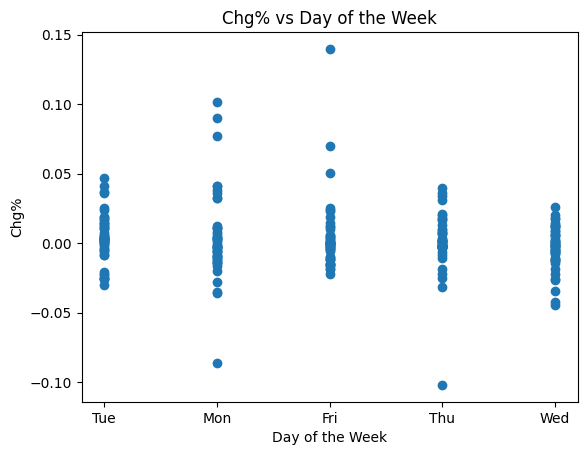

In [9]:
# A3. Please refer to the data present in “IRCTC Stock Price” data sheet of the above excel file. Do the following after loading the data to your programming platform.
# Calculate the mean and variance of the Price data present in column D.
# (Suggestion: if you use Python, you may use numpy.mean()/numpy.var() methods).
# Write your own functions for calculation of mean and variance. Compare the results with the results generated by the package. Compare both accuracy and computational complexity. For computational complexity calculation for a function, make 10 runs for each function and measure time of execution for the function and take average time.
# Select the price data for all Wednesdays and calculate the sample mean. Compare the mean with the population mean and note your observations.
# Select the price data for the month of Apr and calculate the sample mean. Compare the mean with the population mean and note your observations.
# From the Chg% (available in column I) find the probability of making a loss over the stock. (Suggestion: use lambda function to find negative values)
# Calculate the probability of making a profit on Wednesday.
# Calculate the conditional probability of making profit, given that today is Wednesday.
# Make a scatter plot of Chg% data against the day of the week
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

def load_stock_data(file_path):  # Loads IRCTC stock price data from Excel sheet
    return pd.read_excel(file_path,sheet_name="IRCTC Stock Price")

def compute_mean_numpy(data):  # Computes mean using NumPy library
    return np.mean(data)

def compute_variance_numpy(data):  # Computes variance using NumPy library
    return np.var(data)

def mean_manual(data):  # Calculates mean manually using a loop
    s=0
    for value in data:
        s+=value
    return s/len(data)

def variance_manual(data):  # Calculates variance manually using a loop
    s=0
    for value in data:
        s+=value
    m=s/len(data)
    v=0
    for value in data:
        v+=(value-m)**2
    return v/len(data)

def compute_population_mean(df):  # Computes population mean of stock prices
    return np.mean(df["Price"])

def compute_wednesday_mean(df):  # Computes mean stock price for Wednesdays
    wed_prices=df[df["Day"]=="Wed"]["Price"]
    return np.mean(wed_prices)

def compute_april_mean(df):  # Computes mean stock price for April month
    apr_prices=df[df["Month"]=="Apr"]["Price"]
    return np.mean(apr_prices)

def compute_loss_probability(df):  # Calculates probability of making a loss based on Chg%
    return len(list(filter(lambda x:x<0,df["Chg%"])))/len(df)

def compute_profit_on_wednesday(df):  # Calculates probability of profit on Wednesdays
    return len(df[(df["Day"]=="Wed")&(df["Chg%"]>0)])/len(df)

def compute_conditional_profit_given_wednesday(df):  # Calculates conditional probability of profit given Wednesday
    return len(df[(df["Day"]=="Wed")&(df["Chg%"]>0)])/len(df[df["Day"]=="Wed"])

def plot_scatter(df):  # Plots scatter graph of Chg% against day of the week
    plt.figure()
    plt.scatter(df["Day"],df["Chg%"])
    plt.xlabel("Day of the Week")
    plt.ylabel("Chg%")
    plt.title("Chg% vs Day of the Week")
    plt.show()

def main():  # Main function to perform all computations and visualizations
    
    df=load_stock_data(r"C:\Users\durga\Machine Learning - Sem 4\LAB-2")

    X=df["Price"]

    print(compute_mean_numpy(X))
    print(compute_variance_numpy(X))

    print(mean_manual(X.values))
    print(variance_manual(X.values))

    print(compute_population_mean(df))
    print(compute_wednesday_mean(df))
    print(compute_april_mean(df))

    print(compute_loss_probability(df))
    print(compute_profit_on_wednesday(df))
    print(compute_conditional_profit_given_wednesday(df))

    plot_scatter(df)

if __name__=="__main__":
    main()

In [25]:
# A4. Data Exploration: Load the data available in “thyroid0387_UCI” worksheet. Perform the following tasks:
# Study each attribute and associated values present. Identify the datatype (nominal etc.) for the attribute.
# For categorical attributes, identify the encoding scheme to be employed. (Guidance: employ label encoding for ordinal variables while One-Hot encoding may be employed for nominal variables).
# Study the data range for numeric variables.
# Study the presence of missing values in each attribute.
# Study presence of outliers in data.
# For numeric variables, calculate the mean and variance (or standard deviation).
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def load_thyroid_data(file_path):  # Loads thyroid dataset from the specified Excel worksheet
    return pd.read_excel(file_path,sheet_name="thyroid0387_UCI")

def study_datatypes(df):  # Studies datatypes of attributes and identifies categorical columns
    df.info()
    print("Categorical Columns:",df.select_dtypes(include="object").columns)

def encode_categorical(df):  # Encodes categorical attributes using label encoding and one-hot encoding
    le=LabelEncoder()
    binary_cols=["sex","on thyroxine","query on thyroxine","on antithyroid medication",
                 "sick","pregnant","thyroid surgery","I131 treatment",
                 "query hypothyroid","query hyperthyroid","lithium","goitre",
                 "tumor","hypopituitary","psych","TSH measured","T3 measured",
                 "TT4 measured","T4U measured","FTI measured","TBG measured"]

    for col in binary_cols:
        if col in df.columns:
            df[col]=le.fit_transform(df[col].astype(str))

    df=pd.get_dummies(df,columns=["referral source","Condition"],drop_first=True)
    return df

def describe_numeric(df):  # Provides descriptive statistics for numeric variables
    return df.describe()

def check_missing_values(df):  # Checks and displays missing values in each attribute
    print("Missing Values:\n",df.isnull().sum())

def detect_outliers(df):  # Detects outliers in numeric attributes using the IQR method
    numeric_cols=df.select_dtypes(include=[np.number]).columns
    Q1=df[numeric_cols].quantile(0.25)
    Q3=df[numeric_cols].quantile(0.75)
    IQR=Q3-Q1
    outliers=((df[numeric_cols]<(Q1-1.5*IQR))|(df[numeric_cols]>(Q3+1.5*IQR)))
    print("Outliers Count:\n",outliers.sum())

def compute_statistics(df):  # Computes mean and standard deviation for numeric attributes
    numeric_cols=df.select_dtypes(include=np.number).columns
    print("Mean:\n",df[numeric_cols].mean())
    print("Std Dev:\n",df[numeric_cols].std())

def main():  # Main function to execute data exploration steps
    
    df=load_thyroid_data(r"C:\Users\durga\Machine Learning - Sem 4\LAB-2\Lab Session Data.xlsx")

    study_datatypes(df)
    df=encode_categorical(df)

    print(describe_numeric(df))
    check_missing_values(df)
    detect_outliers(df)
    compute_statistics(df)

if __name__=="__main__":
    main()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Record ID                  9172 non-null   int64 
 1   age                        9172 non-null   int64 
 2   sex                        9172 non-null   object
 3   on thyroxine               9172 non-null   object
 4   query on thyroxine         9172 non-null   object
 5   on antithyroid medication  9172 non-null   object
 6   sick                       9172 non-null   object
 7   pregnant                   9172 non-null   object
 8   thyroid surgery            9172 non-null   object
 9   I131 treatment             9172 non-null   object
 10  query hypothyroid          9172 non-null   object
 11  query hyperthyroid         9172 non-null   object
 12  lithium                    9172 non-null   object
 13  goitre                     9172 non-null   object
 14  tumor   

In [24]:
# A5. Similarity Measure: Take the first 2 observation vectors from the dataset. Consider only the attributes (direct or derived) with binary values for these vectors (ignore other attributes). Calculate the Jaccard Coefficient (JC) and Simple Matching Coefficient (SMC) between the document vectors. Use first vector for each document for this. Compare the values for JC and SMC and judge the appropriateness of each of them.
# JC = (f11) / (f01+ f10+ f11)
# SMC = (f11 + f00) / (f00 + f01 + f10 + f11)
# f11= number of attributes where the attribute carries value of 1 in both the vectors.
import numpy as np
import pandas as pd

def load_thyroid_data(file_path):  # Loads thyroid dataset and converts binary categorical values to numeric
    df=pd.read_excel(file_path,sheet_name="thyroid0387_UCI")
    df=df.replace({"t":1,"f":0,"?":np.nan})
    return df

def get_binary_columns(df):  # Identifies columns that contain only binary values (0 or 1)
    return [c for c in df.columns
            if set(df[c].dropna().unique()).issubset({0,1})]

def compute_f_values(v1,v2,binary_cols):  # Computes f11, f10, f01, and f00 values for similarity measures
    b1=v1[binary_cols].values
    b2=v2[binary_cols].values

    f11=np.sum((b1==1)&(b2==1))
    f10=np.sum((b1==1)&(b2==0))
    f01=np.sum((b1==0)&(b2==1))
    f00=np.sum((b1==0)&(b2==0))

    return f11,f10,f01,f00

def compute_similarity(f11,f10,f01,f00):  # Calculates Jaccard Coefficient and Simple Matching Coefficient
    JC=f11/(f01+f10+f11)
    SMC=(f11+f00)/(f00+f01+f10+f11)
    return JC,SMC

def main():  # Main function to compute and compare similarity measures
    
    df=load_thyroid_data(r"C:\Users\durga\Machine Learning - Sem 4\LAB-2\Lab Session Data.xlsx")

    v1=df.iloc[0]
    v2=df.iloc[1]

    binary_cols=get_binary_columns(df)

    f11,f10,f01,f00=compute_f_values(v1,v2,binary_cols)
    JC,SMC=compute_similarity(f11,f10,f01,f00)

    print(f11,f10,f01,f00)
    print(JC,SMC)

if __name__=="__main__":
    main()

1 1 2 16
0.25 0.85


C:\Users\durga\AppData\Local\Temp\ipykernel_11912\4152855763.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({"t":1,"f":0,"?":np.nan})


In [23]:
# A6. Cosine Similarity Measure: Now take the complete vectors for these two observations (including all the attributes). Calculate the Cosine similarity between the documents by using the second feature vector for each document.
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

data=pd.read_excel("Lab Session Data.xlsx",sheet_name="thyroid0387_UCI")
data=data.replace({"t":1,"f":0,"?":np.nan})
data=data.select_dtypes(include=[np.number]).fillna(data.select_dtypes(include=[np.number]).mean())

def get_numeric_vectors(dataframe):  # Extracts complete numeric vectors for the first two observations
    numeric_data=dataframe.select_dtypes(include=[np.number])
    v1=numeric_data.iloc[0].values
    v2=numeric_data.iloc[1].values
    return v1,v2

def compute_cosine_similarity_sklearn(v1,v2):  # Computes cosine similarity using sklearn library
    return cosine_similarity(v1.reshape(1,-1),v2.reshape(1,-1))

def compute_cosine_similarity_manual(v1,v2):  # Computes cosine similarity manually using dot product formula
    dot_product=np.dot(v1,v2)
    magnitude_v1=np.linalg.norm(v1)
    magnitude_v2=np.linalg.norm(v2)
    return dot_product/(magnitude_v1*magnitude_v2)

def main():  # Main function to calculate and compare cosine similarity values
    v1,v2=get_numeric_vectors(data)

    cos_lib=compute_cosine_similarity_sklearn(v1,v2)
    cos_manual=compute_cosine_similarity_manual(v1,v2)

    print("Cosine Similarity (sklearn):")
    print(cos_lib)

    print("\nCosine Similarity (manual):")
    print(cos_manual)

if __name__=="__main__":
    main()

Cosine Similarity (sklearn):
[[1.]]

Cosine Similarity (manual):
0.9999999999999998


C:\Users\durga\AppData\Local\Temp\ipykernel_11912\1395293092.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data=data.replace({"t":1,"f":0,"?":np.nan})


C:\Users\durga\AppData\Local\Temp\ipykernel_11912\1820703699.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({"t":1,"f":0,"?":np.nan})


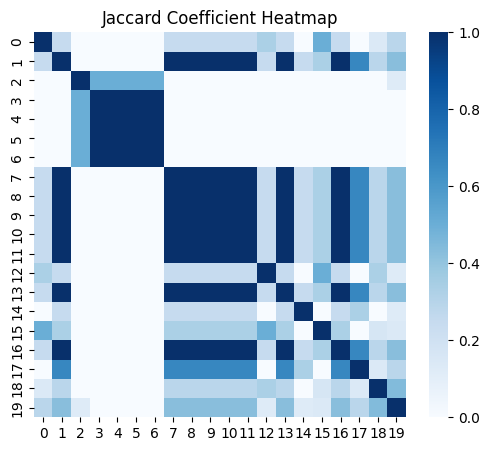

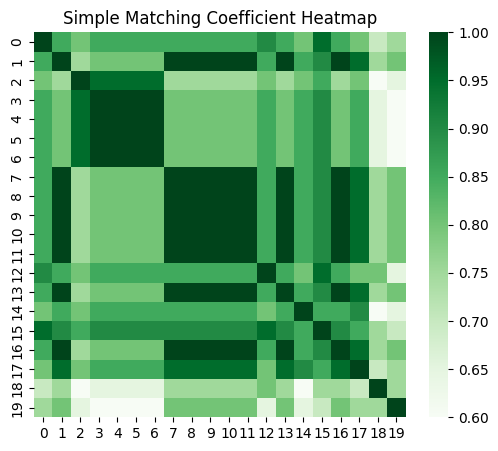

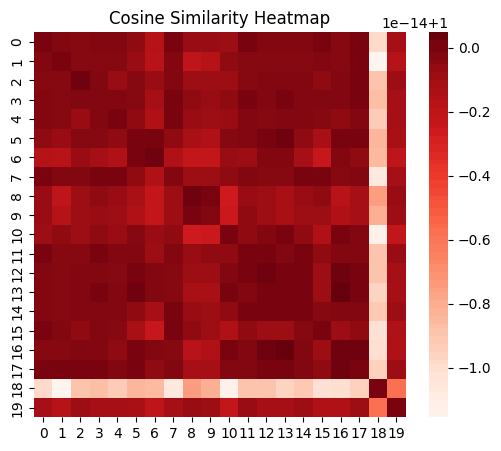

In [14]:
# A7. Heatmap Plot: Consider the first 20 observation vectors. Calculate the JC, SMC and COS between the pairs of vectors for these 20 vectors. Employ similar strategies for coefficient calculation as in A4 & A5. Employ a heatmap plot to visualize the similarities.
# Suggestion to Python users -> import seaborn as sns sns.heatmap(data, annot = True)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_thyroid_data(file_path):  # Loads thyroid dataset and converts binary text values to numeric
    df=pd.read_excel(file_path,sheet_name="thyroid0387_UCI")
    df=df.replace({"t":1,"f":0,"?":np.nan})
    return df

def get_binary_columns(df):  # Identifies columns containing only binary values (0 or 1)
    return [c for c in df.columns
            if set(df[c].dropna().unique()).issubset({0,1})]

def prepare_binary_data(df,binary_cols,n=20):  # Extracts first n rows of binary attribute data
    return df[binary_cols].iloc[:n]

def prepare_numeric_data(df,n=20):  # Extracts and prepares first n rows of numeric data with missing value handling
    num_df=df.select_dtypes(include=[np.number])
    return num_df.fillna(num_df.mean()).iloc[:n]

def initialize_matrices(n):  # Initializes empty similarity matrices for JC, SMC, and COS
    return np.zeros((n,n)),np.zeros((n,n)),np.zeros((n,n))

def compute_similarity_matrices(bin_data,num_data,n):  # Computes JC, SMC, and COS similarity matrices
    JC,SMC,COS=initialize_matrices(n)

    for i in range(n):
        for j in range(n):
            b1=bin_data.iloc[i].values
            b2=bin_data.iloc[j].values

            f11=np.sum((b1==1)&(b2==1))
            f10=np.sum((b1==1)&(b2==0))
            f01=np.sum((b1==0)&(b2==1))
            f00=np.sum((b1==0)&(b2==0))

            JC[i,j]=f11/(f11+f10+f01) if (f11+f10+f01)!=0 else 0
            SMC[i,j]=(f11+f00)/(f11+f10+f01+f00)

            A=num_data.iloc[i].values
            B=num_data.iloc[j].values
            COS[i,j]=np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))

    return JC,SMC,COS

def plot_heatmap(data,title,cmap):  # Plots a heatmap for the given similarity matrix
    plt.figure(figsize=(6,5))
    sns.heatmap(data,cmap=cmap)
    plt.title(title)
    plt.show()

def main():  # Main function to compute similarity matrices and visualize them using heatmaps
    
    n=20

    df=load_thyroid_data(r"C:\Users\durga\Machine Learning - Sem 4\LAB-2\Lab Session Data.xlsx")
    binary_cols=get_binary_columns(df)

    bin_data=prepare_binary_data(df,binary_cols,n)
    num_data=prepare_numeric_data(df,n)

    JC,SMC,COS=compute_similarity_matrices(bin_data,num_data,n)

    plot_heatmap(JC,"Jaccard Coefficient Heatmap","Blues")
    plot_heatmap(SMC,"Simple Matching Coefficient Heatmap","Greens")
    plot_heatmap(COS,"Cosine Similarity Heatmap","Reds")

if __name__=="__main__":
    main()

In [21]:
# A8. Data Imputation: employ appropriate central tendencies to fill the missing values in the data variables. Employ following guidance.
# Mean may be used when the attribute is numeric with no outliers
# Median may be employed for attributes which are numeric and contain outliers
# Mode may be employed for categorical attributes
import numpy as np

def load_thyroid_data(file_path):  # Loads thyroid dataset and converts binary text values to numeric
    df=pd.read_excel(file_path,sheet_name="thyroid0387_UCI")
    df=df.replace({"t":1,"f":0,"?":np.nan})
    return df
    
def replace_missing_values(df):  # Replaces missing value symbols with NaN
    return df.replace("?",np.nan)

def get_column_types(df):  # Identifies numeric and categorical columns in the dataset
    num_cols=df.select_dtypes(include=[np.number]).columns
    cat_cols=df.select_dtypes(exclude=[np.number]).columns
    return num_cols,cat_cols

def detect_outliers(df,num_cols):  # Detects numeric columns containing outliers using the IQR method
    Q1=df[num_cols].quantile(0.25)
    Q3=df[num_cols].quantile(0.75)
    IQR=Q3-Q1

    outlier_cols=[col for col in num_cols
                  if ((df[col]<(Q1[col]-1.5*IQR[col]))|
                      (df[col]>(Q3[col]+1.5*IQR[col]))).any()]
    return outlier_cols

def impute_numeric(df,num_cols,outlier_cols):  # Imputes numeric attributes using mean or median based on outliers
    for col in num_cols:
        if col in outlier_cols:
            df[col]=df[col].fillna(df[col].median())
        else:
            df[col]=df[col].fillna(df[col].mean())
    return df

def impute_categorical(df,cat_cols):  # Imputes categorical attributes using mode
    for col in cat_cols:
        df[col]=df[col].fillna(df[col].mode()[0])
    return df

def main():  # Main function to perform data imputation and verify missing values
    global df_imp

    df=load_thyroid_data(r"C:\Users\durga\Machine Learning - Sem 4\LAB-2\Lab Session Data.xlsx")
    df_imp=replace_missing_values(df)

    num_cols,cat_cols=get_column_types(df_imp)
    outlier_cols=detect_outliers(df_imp,num_cols)

    df_imp=impute_numeric(df_imp,num_cols,outlier_cols)
    df_imp=impute_categorical(df_imp,cat_cols)

    print("Missing values after imputation:\n",df_imp.isnull().sum())

if __name__=="__main__":
    main()

Missing values after imputation:
 Record ID                    0
age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
TBG measured                 0
TBG                          0
referral source              0
Condition                    0
dtype

C:\Users\durga\AppData\Local\Temp\ipykernel_11912\1403630658.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({"t":1,"f":0,"?":np.nan})


In [22]:
# A9. Data Normalization / Scaling: from the data study, identify the attributes which may need normalization. Employ appropriate normalization techniques to create normalized set of data.
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def load_thyroid_data(file_path):  # Loads thyroid dataset and converts binary text values to numeric
    df=pd.read_excel(file_path,sheet_name="thyroid0387_UCI")
    df=df.replace({"t":1,"f":0,"?":np.nan})
    return df
    
def copy_imputed_data(df_imp):  # Creates a copy of the imputed dataset for normalization
    return df_imp.copy()

def get_numeric_columns(df):  # Identifies numeric columns that require normalization
    return df.select_dtypes(include=[np.number]).columns

def apply_minmax_scaling(df,num_cols):  # Applies Min-Max normalization to numeric attributes
    scaler=MinMaxScaler()
    df[num_cols]=scaler.fit_transform(df[num_cols])
    return df

def main():  # Main function to perform data normalization and display results
    global df_norm

    df=load_thyroid_data(r"C:\Users\durga\Machine Learning - Sem 4\LAB-2\Lab Session Data.xlsx")
    df_norm=copy_imputed_data(df_imp)
    num_cols=get_numeric_columns(df_norm)
    df_norm=apply_minmax_scaling(df_norm,num_cols)

    print(df_norm.head())

if __name__=="__main__":
    main()

      Record ID       age sex  on thyroxine  query on thyroxine  \
0  0.000000e+00  0.000427   F           0.0                 0.0   
1  3.410871e-08  0.000427   F           0.0                 0.0   
2  9.891527e-07  0.000610   F           0.0                 0.0   
3  6.934301e-05  0.000534   F           0.0                 0.0   
4  6.937712e-05  0.000473   F           0.0                 0.0   

   on antithyroid medication  sick  pregnant  thyroid surgery  I131 treatment  \
0                        0.0   0.0       0.0              0.0             0.0   
1                        0.0   0.0       0.0              0.0             0.0   
2                        0.0   0.0       0.0              0.0             0.0   
3                        0.0   0.0       0.0              0.0             0.0   
4                        0.0   0.0       0.0              0.0             0.0   

   ...  TT4 measured       TT4  T4U measured       T4U  FTI measured  \
0  ...           0.0  0.170569        

C:\Users\durga\AppData\Local\Temp\ipykernel_11912\762261037.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({"t":1,"f":0,"?":np.nan})
